# Table of Content
1. Importing libraries and dataset
2. Exploring relationships
3. Hypothesis

# 1. Importing libraries and dataset

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [62]:
# Defining path for data import
path = r'/Users/frederikeschulz-mullensiefen/Desktop/Masterfolder_Hotel Bookings'

In [63]:
# Import cleaned hotel bookings dataset 
df_bookings = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'hotel_bookings_cleaned.pkl'))

In [64]:
# Setting no limit on max columns to display
pd.set_option('display.max_columns', None)

In [65]:
df_bookings.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,total_guests,total_number_nights
2,Resort Hotel,0,7,2015,July,27,0,1,1,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,75.0,Check-Out,1.0,1
3,Resort Hotel,0,13,2015,July,27,0,1,1,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,75.0,Check-Out,1.0,1
4,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,98.0,Check-Out,2.0,2
5,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,98.0,Check-Out,2.0,2
6,Resort Hotel,0,0,2015,July,27,0,2,2,0.0,0,BB,PRT,0,0,0,0,No Deposit,0,Transient,107.0,Check-Out,2.0,2


# 2. Exploring relationships

### 1. Correlation Heat Map

In [66]:
# Creating a subset with relevant variables 
df_sub = df_bookings[['is_canceled','lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'total_guests', 'total_number_nights']]

In [67]:
df_sub.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_guests,total_number_nights
2,0,7,0,1,1,0.0,0,0,0,0,0,75.0,1.0,1
3,0,13,0,1,1,0.0,0,0,0,0,0,75.0,1.0,1
4,0,14,0,2,2,0.0,0,0,0,0,0,98.0,2.0,2
5,0,14,0,2,2,0.0,0,0,0,0,0,98.0,2.0,2
6,0,0,0,2,2,0.0,0,0,0,0,0,107.0,2.0,2


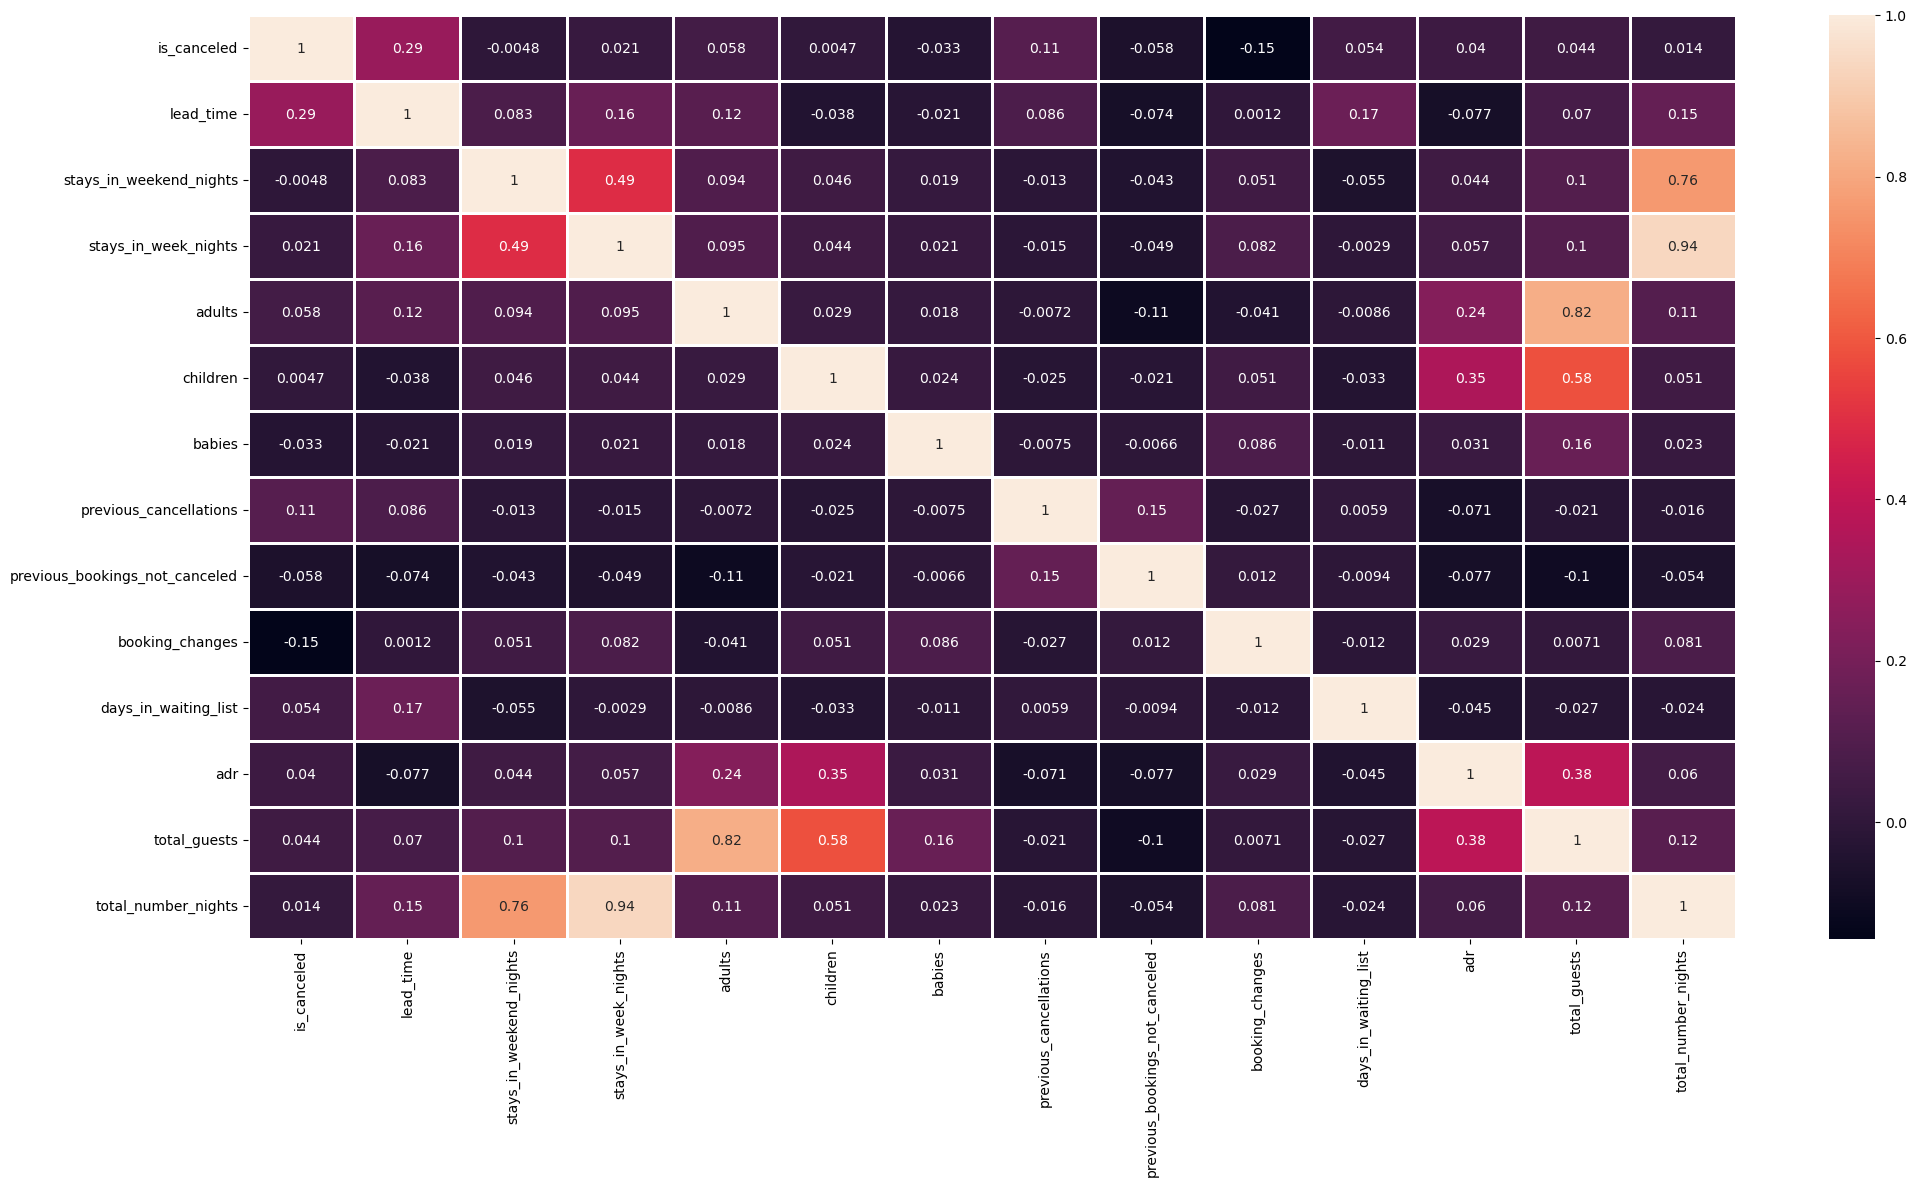

In [68]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(24,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax, linewidths = 1)

##### Analysis Correlation Heat Map
The correlation heat map coefficients show the level of interdependence between the different variables of the subset. Apart from the coeffcients of 1 between the identical variables respectively, the strongest relationships are the ones between adults, children and total_guests as well as stays_in_weekend_nights, stays_in_week_nights and total_number_nights. However, these are logical relationships as total_guests and total_number_nights are a result (the sum) of the other variables, therefore, the relationships between these variables should be disregarded for further exploration of correlation. 

Apart from the above mentioned relationships, the next strongest relationship is the one between the average daily rate (adr) and the total_guests. Here, the coefficient of 0.38 suggests a moderate, positive relationship, which means the higher the number of guests, the higher the average daily rate for the hotel. But in general, there does not seem to be a high level of interdependence between the different variables.

### 2. Scatterplot

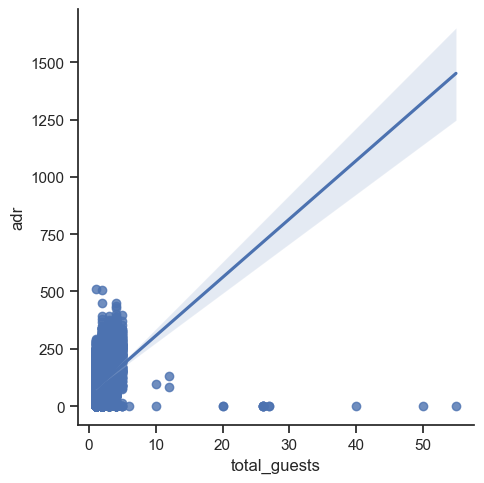

In [91]:
# Create a scatterplot for the "total guests" and "adr" columns
sns.lmplot(data = df_bookings, x = 'total_guests', y = 'adr')

##### Analysis scatter plot
While there does seem to be a moderate positive relationship between the number of guests and the adr, it may only be true for a guest count of around 6-7. While there are not a lot of observations with a guest count of higher than 6-7, these observations seem to have a rathert low adr. 
Thus, at a certain point the logic of an increasing adr for increasing number of guests does not hold true anymore. 

### 3. Pair plot

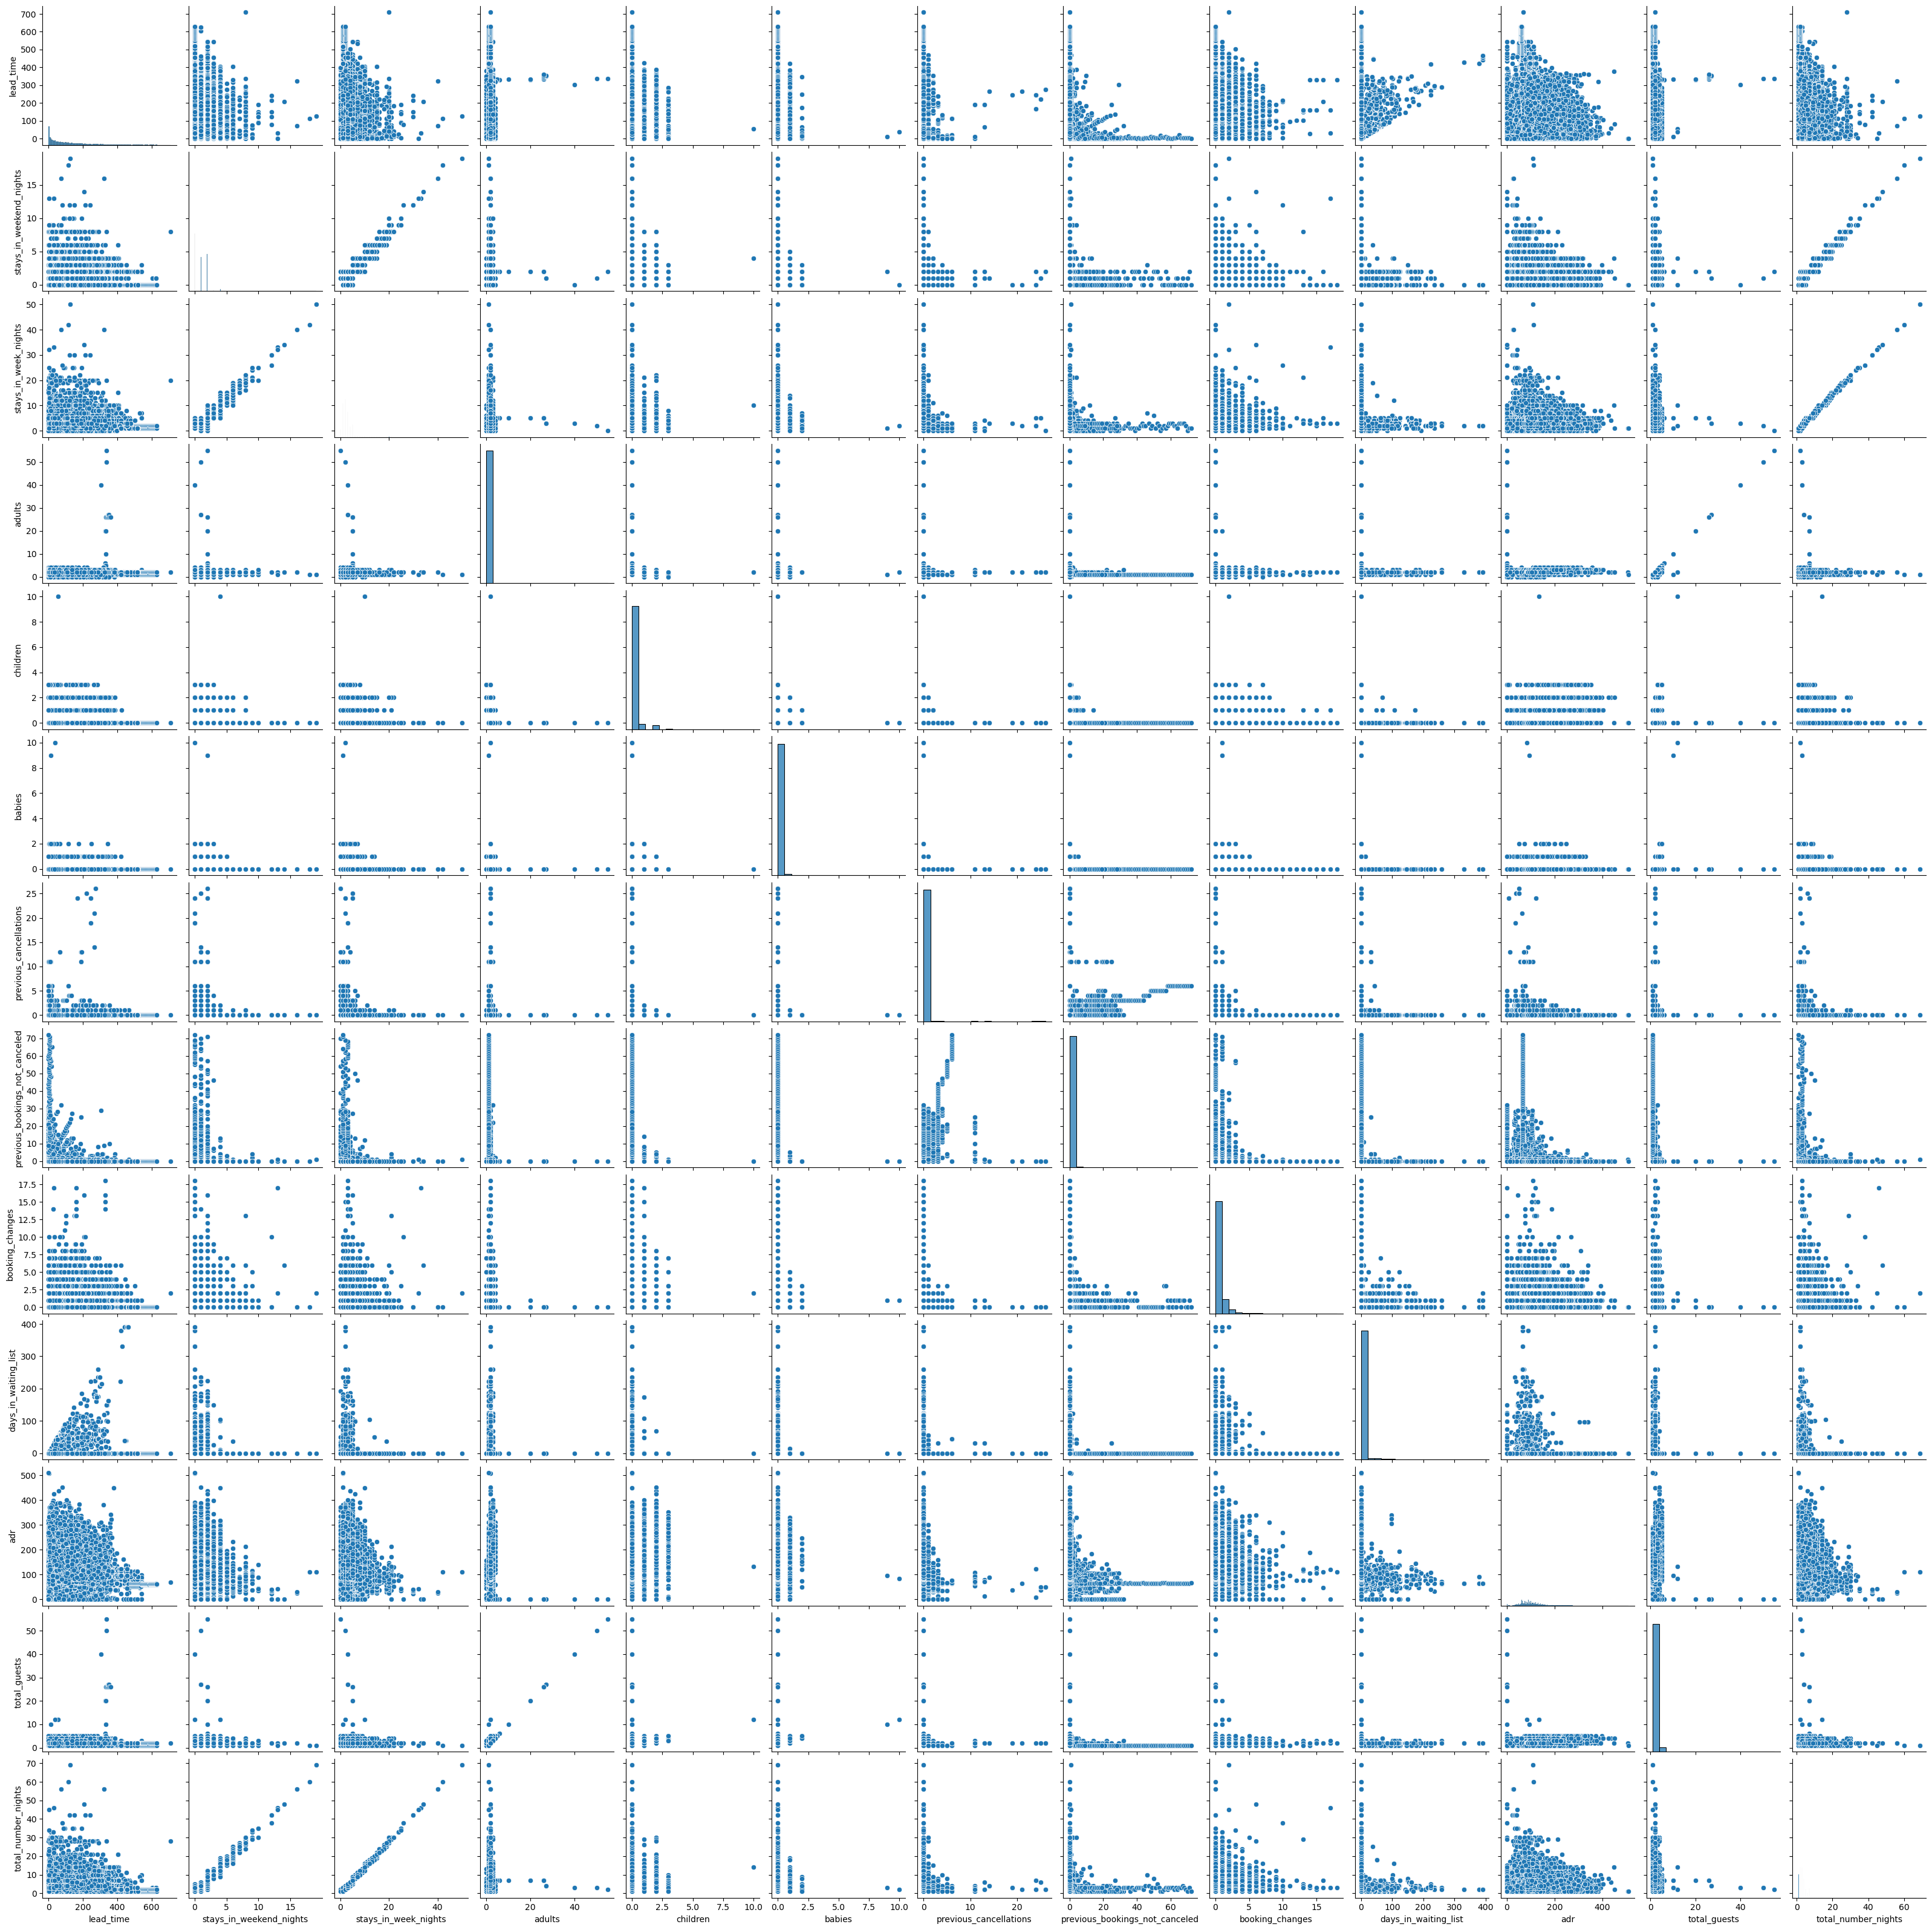

In [71]:
# Create a pair plot for entire subset
g = sns.pairplot(df_sub)

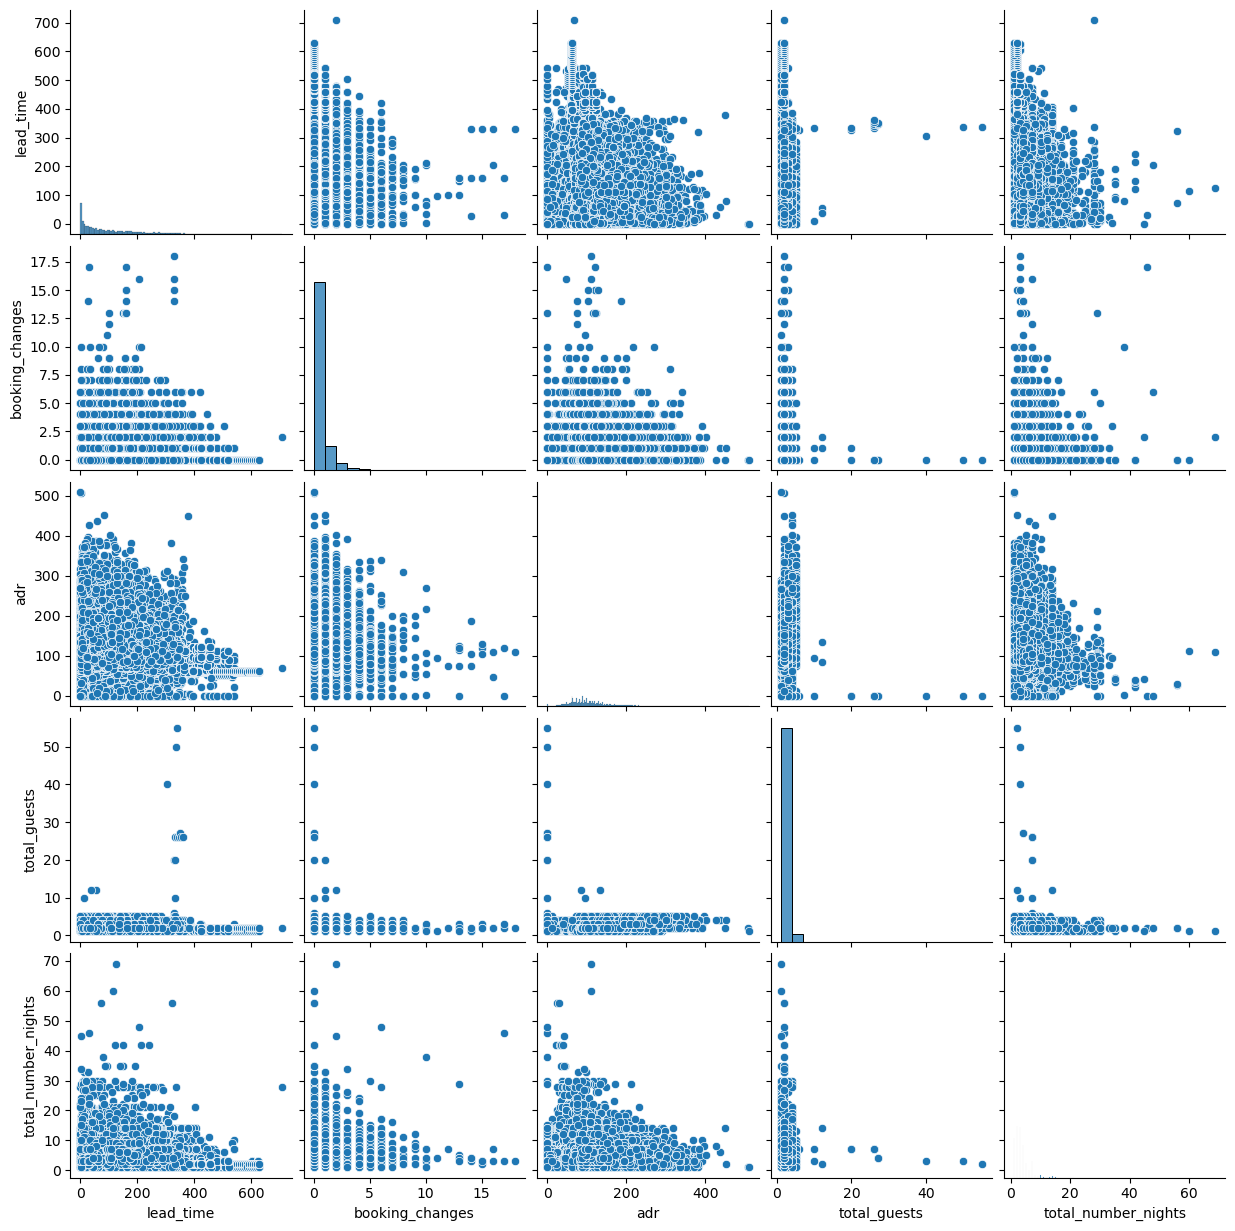

In [72]:
# Create a smaller subset for pair plot
df_sub_2 = df_sub[['is_canceled','lead_time', 'booking_changes', 'adr', 'total_guests', 'total_number_nights']]

# Create a pair plot for smaller subset
g = sns.pairplot(df_sub_2)

##### Analysis Pair Plots
Also the categorical plots showcase that there do not seem to be high interdependences between the different variables. 
However, the interdependence between the adr and the total number of guests, total number of nights, lead time should be further explored as there is a trend noticeable and as this is relevant for the project questions. 

### 4. Categorical plots

<Axes: xlabel='adr', ylabel='Count'>

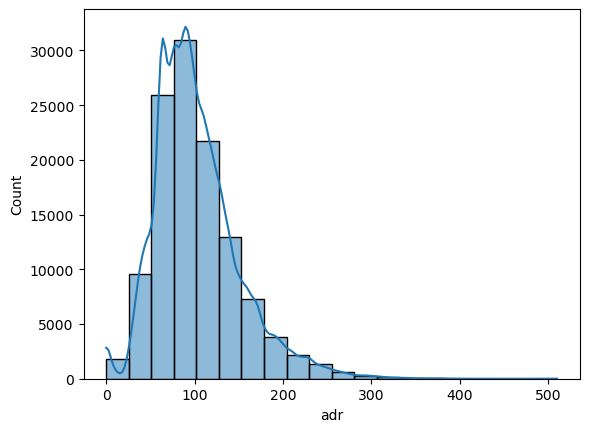

In [76]:
# Use a histogram to visualize the distribution of the adr
sns.histplot(df_bookings['adr'], bins = 20, kde = True)

In [77]:
# Create categories for adr 
df_bookings.loc[df_bookings['adr'] < 50, 'adr_category'] = 'Low ADR'
df_bookings.loc[(df_bookings['adr'] >= 50) & (df_bookings['adr'] < 150), 'adr_category'] = 'Medium ADR'
df_bookings.loc[df_bookings['adr'] >= 150, 'adr_category'] = 'High ADR'

In [80]:
# Check counts for different ADR categories
df_bookings['adr_category'].value_counts(dropna = False)

adr_category
Medium ADR    90899
High ADR      16883
Low ADR       10777
Name: count, dtype: int64

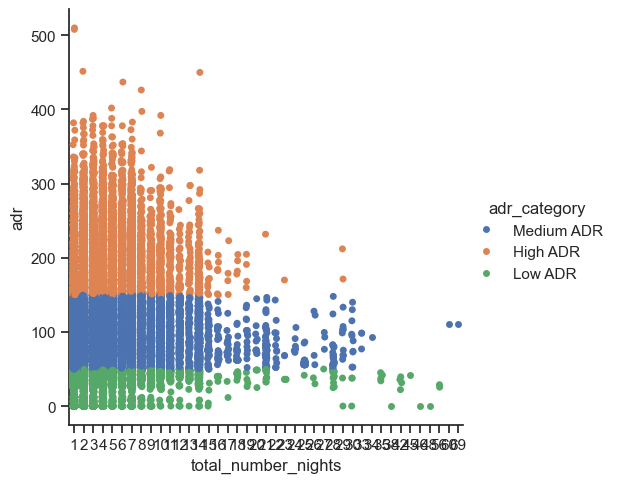

In [94]:
# Create a categorical plot in seaborn using the adr categories 
sns.set(style="ticks")
g = sns.catplot(x="total_number_nights", y="adr", hue="adr_category", data=df_bookings)

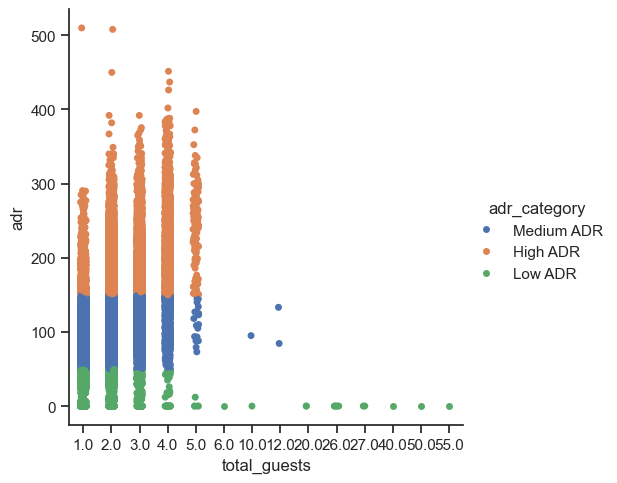

In [95]:
# Create a categorical plot in seaborn using the adr categories 
sns.set(style="ticks")
g = sns.catplot(x="total_guests", y="adr", hue="adr_category", data=df_bookings)

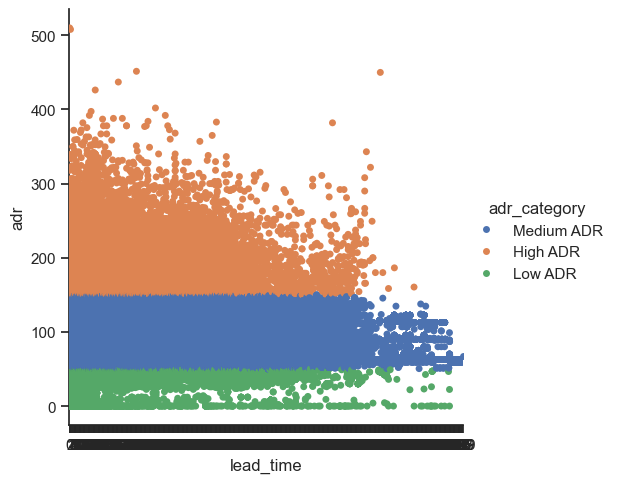

In [100]:
# Create a categorical plot in seaborn using the adr categories 
sns.set(style="ticks")
g = sns.catplot(x="lead_time", y="adr", hue="adr_category", data=df_bookings)

##### Analysis categorical plots

###### Analysis adr & total number of nights
It does seem like the adr decreases as the number of total nights increases. For instance, from 18 nights onwards, there are hardly any observations with a high adr, and from 30 nights onwards, there are mostly observations with a low adr. Nevertheless, the correlation coefficient of 0.06 does not suggest that there is a correlation. 

###### Analysis adr & total guests
It seems like the adr increases for a guest count of 2-5 people, as the proportion of high adr observations is high for this count of guests. However, from a guest count of 6 people and more, there are only low- and medium- adr observations left. The correlation coefficent of 0.38 suggests a moderate positive relationship between these variables.

###### Analysis adr & lead time
It seems like the higher the lead time, the less observations of high adr there are. But there seems to be only an impact up to a certain points, as the number of medium adrs does not seem to decrease based on the lead time. In addition, the correlation coefficient of -0.077 does not suggest a relationship between these variables. 


# 3. Hypothesis 

From the initial exploratory analysis, we could formulate the following hypotheses:

1. If there are multiple guests in a booking, then the adr will be higher.  
2. If the lead time increases, then the adr will decrease.
3. If the duration of stay is high, then the adr will be lower. 